## Data Praparation

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#reading csv file
churn_data = pd.read_csv(r"D:\Ashima\PGDML\ML-2\Telecom Churn Case Study\telecom_churn_data.csv")

In [3]:
churn_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [4]:
churn_data.shape

(99999, 226)

In [5]:
#Let us first extract the recharge amount columns
recharge_amt_columns = churn_data.columns[churn_data.columns.str.contains('rech_amt|rech_data')]
recharge_amt_columns

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

In [6]:
null_values = 100*churn_data.loc[:,recharge_amt_columns].isnull().sum()/len(churn_data)
null_values

total_rech_amt_6             0.000000
total_rech_amt_7             0.000000
total_rech_amt_8             0.000000
total_rech_amt_9             0.000000
max_rech_amt_6               0.000000
max_rech_amt_7               0.000000
max_rech_amt_8               0.000000
max_rech_amt_9               0.000000
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
date_of_last_rech_data_8    73.660737
date_of_last_rech_data_9    74.077741
total_rech_data_6           74.846748
total_rech_data_7           74.428744
total_rech_data_8           73.660737
total_rech_data_9           74.077741
max_rech_data_6             74.846748
max_rech_data_7             74.428744
max_rech_data_8             73.660737
max_rech_data_9             74.077741
av_rech_amt_data_6          74.846748
av_rech_amt_data_7          74.428744
av_rech_amt_data_8          73.660737
av_rech_amt_data_9          74.077741
dtype: float64

### We can see more that 74% values of recharge data is missing which shows no recharge has been done by the customer. This can be replaced by 0

In [7]:
churn_data['total_rech_data_6'] = churn_data['total_rech_data_6'].replace(np.NaN,0.0)
churn_data['total_rech_data_7'] = churn_data['total_rech_data_7'].replace(np.NaN,0.0)
churn_data['total_rech_data_8'] = churn_data['total_rech_data_8'].replace(np.NaN,0.0)

In [8]:
churn_data['av_rech_amt_data_6'] = churn_data['av_rech_amt_data_6'].replace(np.NaN,0.0)
churn_data['av_rech_amt_data_7'] = churn_data['av_rech_amt_data_7'].replace(np.NaN,0.0)
churn_data['av_rech_amt_data_8'] = churn_data['av_rech_amt_data_8'].replace(np.NaN,0.0)

### 1. Derive new features


### We can create new feature as total_rech_amt_data using total_rech_data and av_rech_amt_data to capture amount utilized by customer for data.

In [9]:
# let's add new column total recharge amount for data: total_rech_amt_data for calculating High Value customer process
churn_data['total_rech_amt_data_6'] = churn_data.av_rech_amt_data_6 * churn_data.total_rech_data_6
churn_data['total_rech_amt_data_7'] = churn_data.av_rech_amt_data_7 * churn_data.total_rech_data_7
churn_data['total_rech_amt_data_8'] = churn_data.av_rech_amt_data_8 * churn_data.total_rech_data_8

### Defining total average recharge amount for good phase for months 6 and 7 (the good phase)

In [10]:
churn_data['total_avg_rech_amnt_6_7_GPhase'] = (churn_data.total_rech_amt_6 + churn_data.total_rech_amt_data_6
                                               + churn_data.total_rech_amt_7+ churn_data.total_rech_amt_data_7)/2

### 2. Filter high-value customers

In [11]:
#Those who have recharged with an amount more than or equal to X, 
#where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

high_value_filter = churn_data.total_avg_rech_amnt_6_7_GPhase.quantile(0.7)
high_value_filter

high_val_cust_df = churn_data[churn_data.total_avg_rech_amnt_6_7_GPhase > high_value_filter]
high_val_cust_df

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,696.0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,NaN,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,640.0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,1.0,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,583.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99981,7000630859,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,384.316,...,NaN,473,1100.43,619.59,668.05,0.33,252.0,252.0,252.0,564.0
99984,7000661676,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,328.594,...,1.0,820,0.00,0.00,0.00,0.00,154.0,484.0,585.0,618.5
99986,7001729035,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,644.973,...,1.0,2696,497.45,598.67,604.08,0.00,17.0,14.0,25.0,864.0
99988,7002111859,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,312.558,...,1.0,328,104.73,0.00,0.00,0.00,0.0,154.0,154.0,544.0


In [12]:
high_val_cust_df.shape

(29953, 230)

### 3. Tag churners and remove attributes of the churn phase

In [13]:
high_val_cust_9 = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9','vol_3g_mb_9']

In [14]:
high_val_cust_9_null_values = 100*high_val_cust_df.loc[:,high_val_cust_9].isnull().sum()/len(high_val_cust_df)

In [15]:
high_val_cust_9_null_values

total_ic_mou_9    0.0
total_og_mou_9    0.0
vol_2g_mb_9       0.0
vol_3g_mb_9       0.0
dtype: float64

In [16]:
# Initially set all the values as 0
high_val_cust_df['churn']= 0

In [17]:
#is_churned boolean flag for customers where above values are zero
is_churned = (high_val_cust_df.total_ic_mou_9 == 0) & (high_val_cust_df.total_og_mou_9 == 0) & (high_val_cust_df.vol_2g_mb_9 ==0) & (high_val_cust_df.vol_3g_mb_9 ==0)

In [18]:
# set all which having is_churned True condition as 1
high_val_cust_df.loc[is_churned,'churn']=1

In [19]:
# let us check what's the % of churned customers
100*high_val_cust_df.churn.sum()/len(high_val_cust_df)

8.122725603445398

### After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [20]:
churn_month_columns =  high_val_cust_df.columns[high_val_cust_df.columns.str.contains('_9')]

In [21]:
churn_month_columns

Index(['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9',
       'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9',
       'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9',
       'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9',
       'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9',
       'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9',
       'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9',
       'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9',
       'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9',
       'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9',
       'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9',
       'date_of_last_rech_data_9', 'total_rech_data_9', 'max_rech_data_9',
       'count_rech_2g_9', 'count_rech_3g_9', 'av_rech_amt_data_9',
       'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'arpu_2g_9',
       'night_pck_user

In [22]:
# drop all columns corresponding to the churn phase
high_val_cust_df.drop(churn_month_columns,axis=1,inplace=True)

In [23]:
high_val_cust_df.shape

(29953, 177)

### Now high-value customers dataset is useful for us which can be further processed like converting columns to approprate format and handling missing values.

In [24]:
#Checking all numerical variables
#num_features=[i for i in high_val_cust_df.columns if high_val_cust_df.dtypes[i]=='int64' or 'float64' or 'int32']
#num_features

In [25]:
high_val_cust_df.value_counts()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  last_date_of_month_6  last_date_of_month_7  last_date_of_month_8  arpu_6    arpu_7    arpu_8    onnet_mou_6  onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2c_mou_6  loc_og_t2c_mou_7  loc_og_t2c_mou_8  loc_og_mou_6  loc_og_mou_7  loc_og_mou_8  std_og_t2t_mou_6  std_og_t2t_mou_7  std_og_t2t_mou_8  std_og_t2m_mou_6  std_og_t2m_mou_7  std_og_t2m_mou_8  std_og_t2f_mou_6  std_og_t2f_mou_7  std_og_t2f_mou_8  std_og_t2c_mou_6  std_og_t2c_mou_7  std_og_t2c_mou_8  std_og_mou_6  std_og_mou_7  std_og_mou_8  isd_og_mou_6  isd_og_mou_7  isd_og_mou_8  spl_og_mou_6  spl_og_mou_7  spl_og_mou_8  og_others_6  og_others_7  og_others_8  total_og_mou_6  tota

In [26]:
#checking columns which has only 1 unique value. These columns are not useful for our analysis.
unique_1_col=[]
for i in high_val_cust_df.columns:
    if high_val_cust_df[i].nunique() == 1:
        unique_1_col.append(i)
    else:
        pass
print(unique_1_col)

['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


In [27]:
# dropping unique_1_col
high_val_cust_df.drop(unique_1_col, axis=1, inplace = True)

In [28]:
high_val_cust_df.shape

(29953, 164)

In [29]:
high_val_cust_df.dtypes

mobile_number                       int64
arpu_6                            float64
arpu_7                            float64
arpu_8                            float64
onnet_mou_6                       float64
                                   ...   
total_rech_amt_data_6             float64
total_rech_amt_data_7             float64
total_rech_amt_data_8             float64
total_avg_rech_amnt_6_7_GPhase    float64
churn                               int64
Length: 164, dtype: object

In [30]:
#Checking all numerical variables
date_features=[i for i in high_val_cust_df.columns if high_val_cust_df.dtypes[i]=='object']
date_features

['date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8']

In [31]:
high_val_cust_df[date_features].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014
7,6/27/2014,7/25/2014,8/26/2014,NaN,NaN,NaN
8,6/25/2014,7/31/2014,8/30/2014,NaN,7/31/2014,8/23/2014
21,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
23,6/18/2014,7/7/2014,8/24/2014,NaN,7/7/2014,8/6/2014


In [32]:
for col in date_features:
    high_val_cust_df[col] = pd.to_datetime(high_val_cust_df[col])

In [33]:
high_val_cust_df[date_features].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,2014-06-21,2014-07-16,2014-08-08,2014-06-21,2014-07-16,2014-08-08
7,2014-06-27,2014-07-25,2014-08-26,NaT,NaT,NaT
8,2014-06-25,2014-07-31,2014-08-30,NaT,2014-07-31,2014-08-23
21,2014-06-30,2014-07-31,2014-08-31,NaT,NaT,NaT
23,2014-06-18,2014-07-07,2014-08-24,NaT,2014-07-07,2014-08-06


In [34]:
high_val_cust_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_amt_data_6,total_rech_amt_data_7,total_rech_amt_data_8,total_avg_rech_amnt_6_7_GPhase,churn
0,7000842753,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,...,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0,1
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0,1
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,696.0,0
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,640.0,0
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,583.0,0


In [35]:
# create box plot for  6th, 7th and 8th month
def plot_box_chart(attribute):
    plt.figure(figsize=(20,16))
    df = high_val_cust_df
    plt.subplot(2,3,1)
    sns.boxplot(data=df, y=attribute+"_6",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,2)
    sns.boxplot(data=df, y=attribute+"_7",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.subplot(2,3,3)
    sns.boxplot(data=df, y=attribute+"_8",x="churn",hue="churn",
                showfliers=False,palette=("plasma"))
    plt.show()

### Recharge amount related variables

In [36]:
#recharge amount related variables
recharge_amnt_columns =  high_val_cust_df.columns[high_val_cust_df.columns.str.contains('rech_amt')]
recharge_amnt_columns.tolist()

['total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'max_rech_amt_6',
 'max_rech_amt_7',
 'max_rech_amt_8',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'total_rech_amt_data_6',
 'total_rech_amt_data_7',
 'total_rech_amt_data_8']

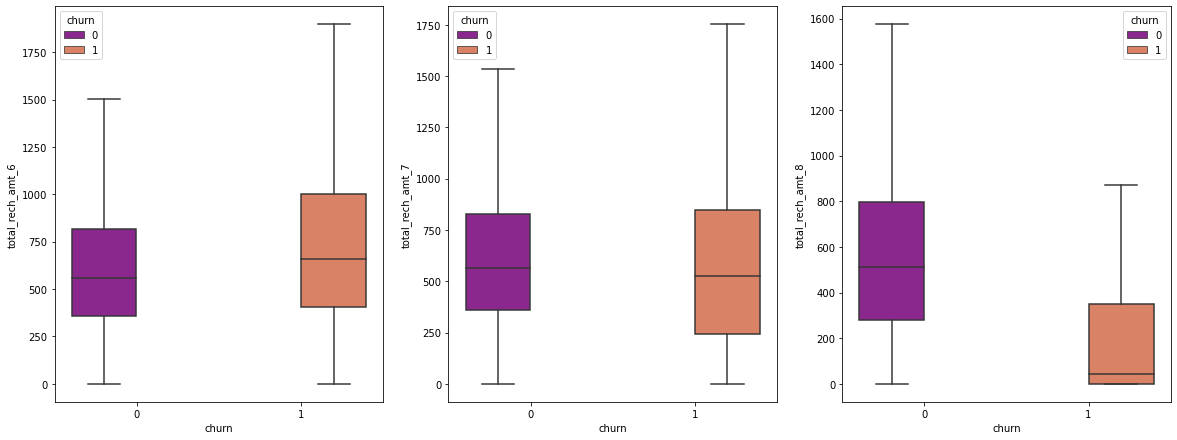

In [37]:
# Ploting for total recharge amount:
plot_box_chart('total_rech_amt')

### We can see a drop in the total recharge amount for churned customers in the 8th Month (Action Phase).

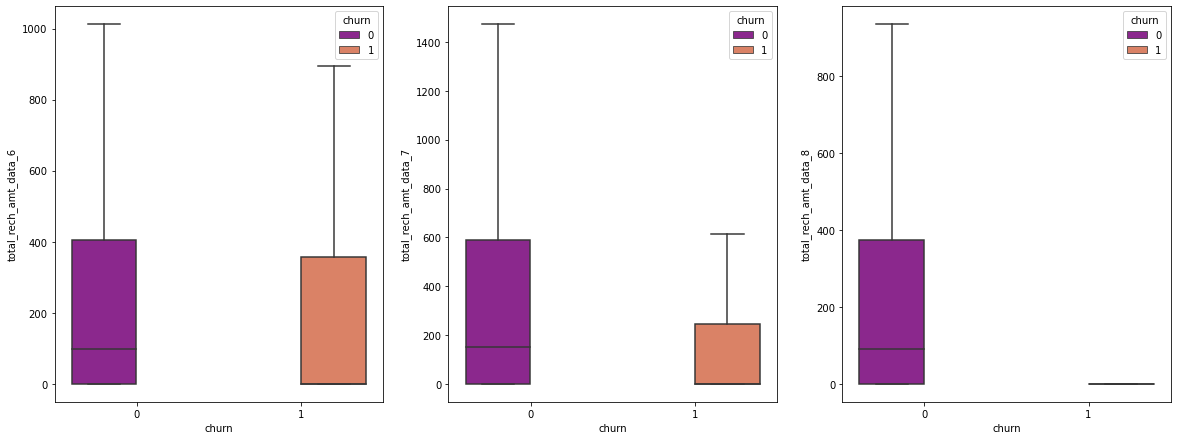

In [38]:
# Ploting for total recharge amount for data:
plot_box_chart('total_rech_amt_data')

### We can see that there is a huge drop in total recharge amount for data in the 8th month (action phase) for churned customers.

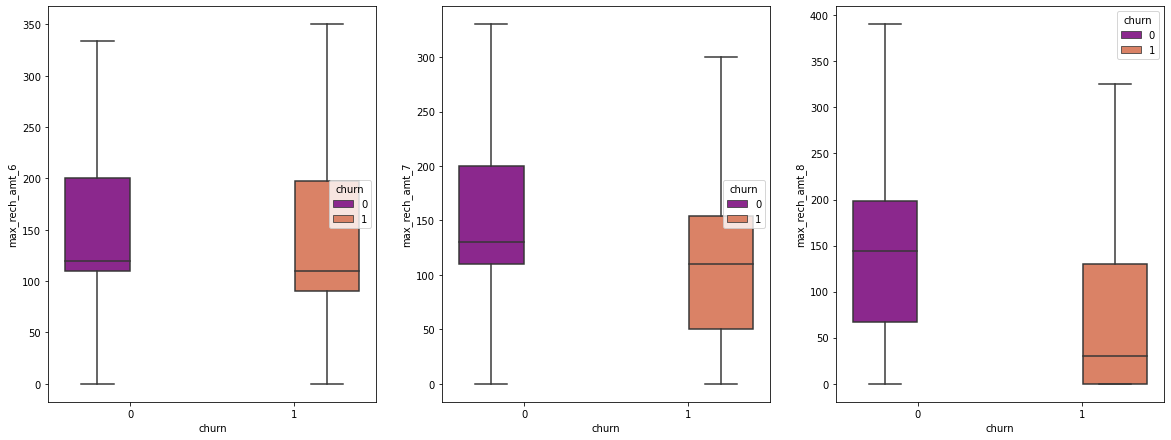

In [39]:
# Ploting for maximum recharge amount for data:
plot_box_chart('max_rech_amt')

### We can see that there is a huge drop in maximum recharge amount for data in the 8th month (action phase) for churned customers

In [40]:
# Let's check other recharge related variables:
other_recharge = high_val_cust_df.columns[high_val_cust_df.columns.str.contains('rech_num|max_rech_data',regex=True)]

In [41]:
# lets check the % of NA values for other recharge related variables
100*high_val_cust_df.loc[:,other_recharge].isnull().sum()/len(high_val_cust_df)

total_rech_num_6     0.000000
total_rech_num_7     0.000000
total_rech_num_8     0.000000
max_rech_data_6     44.112443
max_rech_data_7     43.117551
max_rech_data_8     46.799987
dtype: float64

In [42]:
high_val_cust_df.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].describe()

,max_rech_data_6,max_rech_data_7,max_rech_data_8
count,16740.000000,17038.000000,15935.000000
mean,139.804002,140.444712,136.353373
std,118.892926,120.295284,119.571138
min,1.000000,1.000000,1.000000
25%,25.000000,25.000000,25.000000
50%,152.000000,152.000000,152.000000
75%,198.000000,198.000000,198.000000
max,1555.000000,1555.000000,1555.000000


### We see that the minimum value is 1 while the max is 1555 across months, which indicate the missing values are where no recharges happened for the data, Filling the missing values by 0 , means no recharge.

In [43]:
high_val_cust_df.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']] = high_val_cust_df.loc[:,['max_rech_data_6','max_rech_data_7','max_rech_data_8']].replace(np.nan,0)

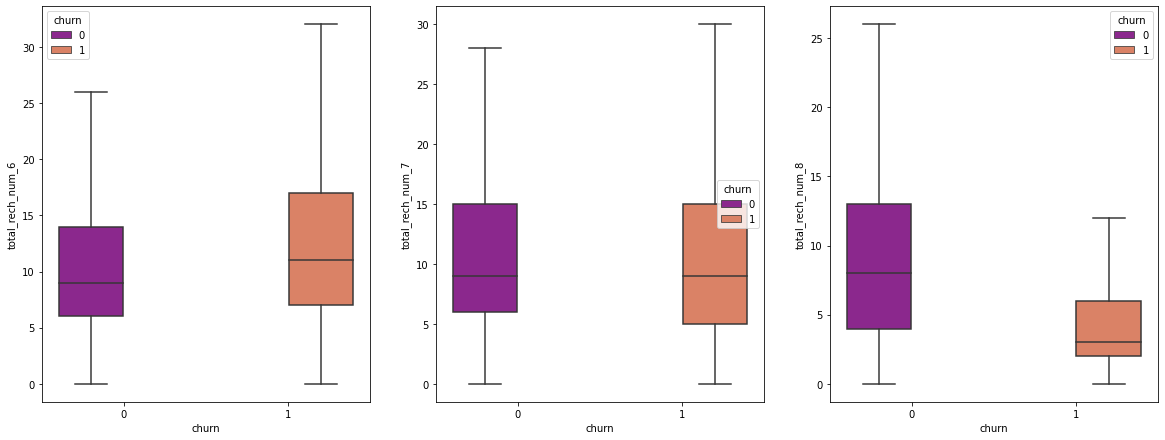

In [44]:
# Ploting for Total recharge for Number:
plot_box_chart('total_rech_num')

### We can see that there is a huge drop in total recharge number also in the 8th month (action phase) for churned customers.

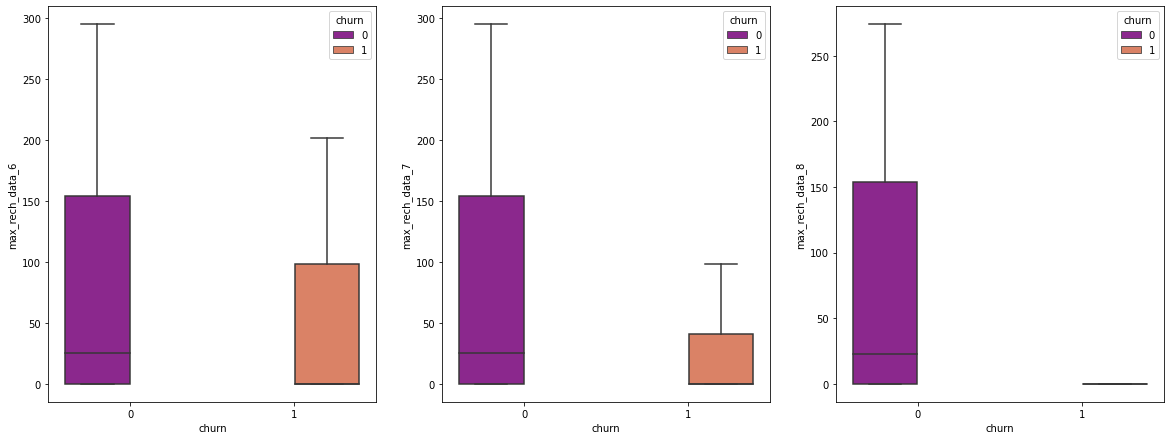

In [45]:
# Ploting for maximum recharge for data:
plot_box_chart('max_rech_data')

### We can see that there is a huge drop in maximum recharge for data also in the 8th month (action phase) for churned customers.

In [46]:
#Getting the last day recharge amount columns
last_day_rech_amt = high_val_cust_df.columns[high_val_cust_df.columns.str.contains('day')]

In [47]:
last_day_rech_amt.tolist()

['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8']

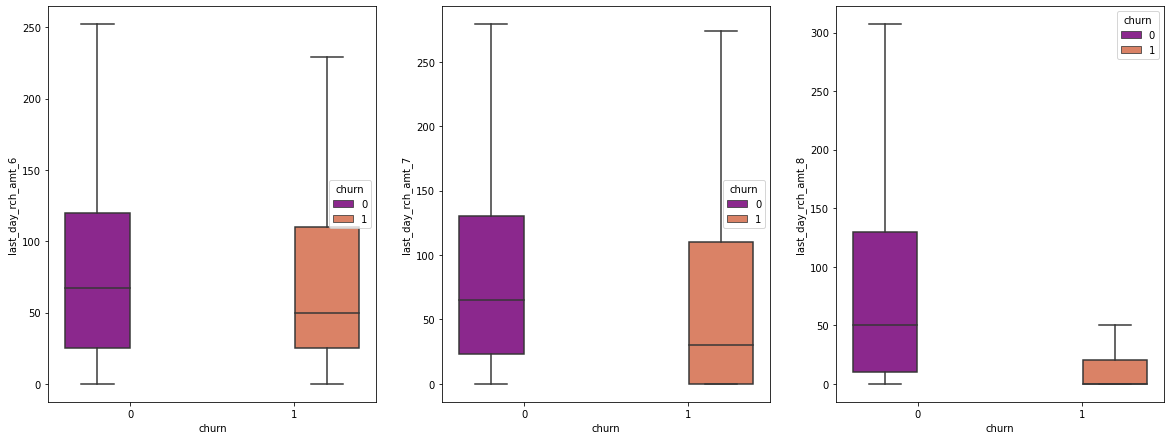

In [48]:
# Ploting for last day recharge amount:
plot_box_chart('last_day_rch_amt')

### We are getting a huge drop in 8th month recharge amount for churned customers.

### 2G and 3G usage related attributes

In [49]:
variables_2g_3g = high_val_cust_df.columns[high_val_cust_df.columns.str.contains('2g|3g',regex=True)]

In [50]:
#let us check the % of NA values present
100*high_val_cust_df.loc[:,variables_2g_3g].isnull().sum()/len(high_val_cust_df.loc[:,variables_2g_3g])

count_rech_2g_6    44.112443
count_rech_2g_7    43.117551
count_rech_2g_8    46.799987
count_rech_3g_6    44.112443
count_rech_3g_7    43.117551
count_rech_3g_8    46.799987
vol_2g_mb_6         0.000000
vol_2g_mb_7         0.000000
vol_2g_mb_8         0.000000
vol_3g_mb_6         0.000000
vol_3g_mb_7         0.000000
vol_3g_mb_8         0.000000
arpu_3g_6          44.112443
arpu_3g_7          43.117551
arpu_3g_8          46.799987
arpu_2g_6          44.112443
arpu_2g_7          43.117551
arpu_2g_8          46.799987
monthly_2g_6        0.000000
monthly_2g_7        0.000000
monthly_2g_8        0.000000
sachet_2g_6         0.000000
sachet_2g_7         0.000000
sachet_2g_8         0.000000
monthly_3g_6        0.000000
monthly_3g_7        0.000000
monthly_3g_8        0.000000
sachet_3g_6         0.000000
sachet_3g_7         0.000000
sachet_3g_8         0.000000
aug_vbc_3g          0.000000
jul_vbc_3g          0.000000
jun_vbc_3g          0.000000
sep_vbc_3g          0.000000
dtype: float64

### We are getting more than 40% values are not available for count of recharge and average revenue for 2G/3G per user. Although we have 2G/3G volume usage based data available, we can drop these columns.

In [51]:
high_val_cust_df.drop(['count_rech_2g_6','count_rech_2g_7',
              'count_rech_2g_8','count_rech_3g_6','count_rech_3g_7','count_rech_3g_8'
               ,'arpu_3g_6','arpu_3g_7','arpu_3g_8','arpu_2g_6','arpu_2g_7','arpu_2g_8'],axis=1,inplace=True)

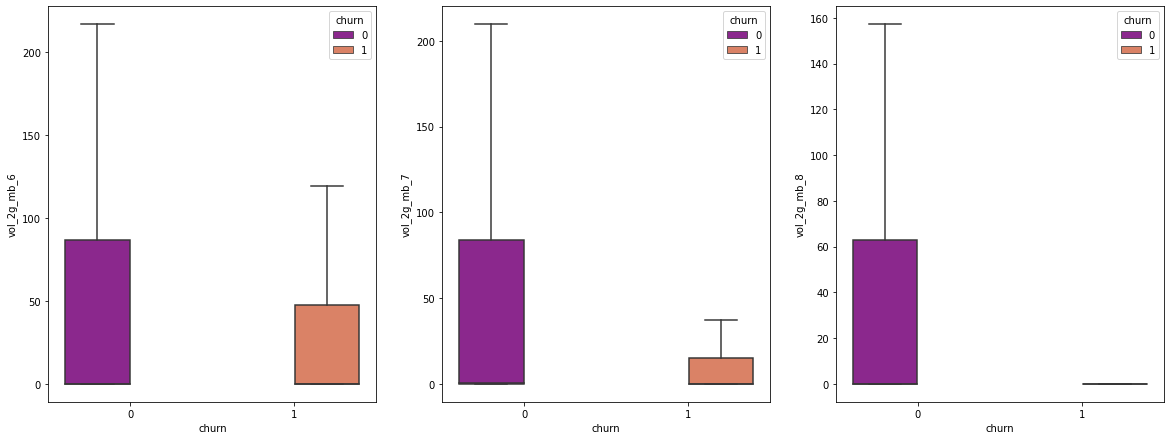

In [52]:
# Ploting for volume of 2G and 3G usage columns:
plot_box_chart('vol_2g_mb')

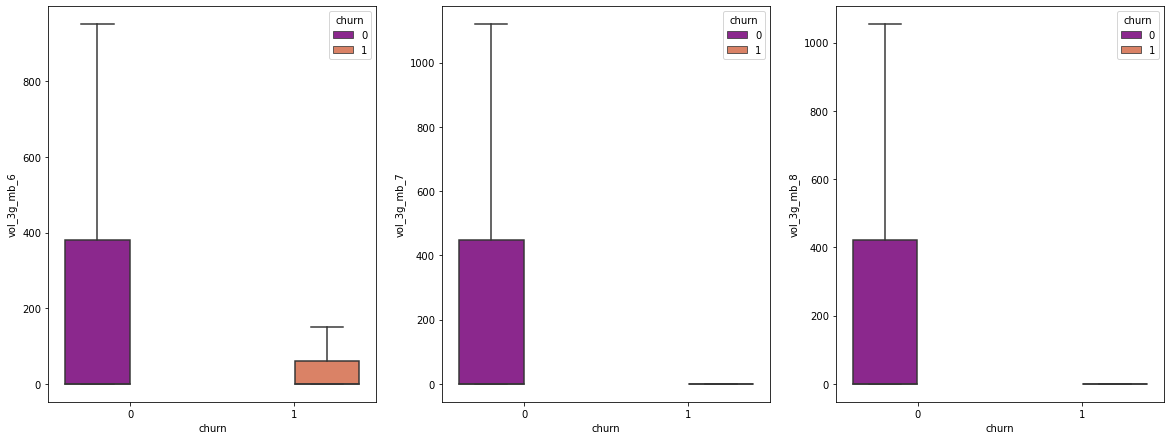

In [53]:
plot_box_chart('vol_3g_mb')

### We have two observations from above:
1. 2G and 3G usage for churned customers drops in 8th month
2. We also see that 2G/3G usage is higher for non-churned customers indicating that churned customers might be from areas where 2G/3G service is not properly available.

In [54]:
# let's check monthly 2G/3G service schemes
monthly_subcription_2g_3g = high_val_cust_df.columns[high_val_cust_df.columns.str.contains('monthly_2g|monthly_3g',regex=True)]
monthly_subcription_2g_3g.tolist()

['monthly_2g_6',
 'monthly_2g_7',
 'monthly_2g_8',
 'monthly_3g_6',
 'monthly_3g_7',
 'monthly_3g_8']

In [55]:
#Checking Null value
100*high_val_cust_df.loc[:,monthly_subcription_2g_3g].isnull().sum()/len(high_val_cust_df.loc[:,monthly_subcription_2g_3g])

monthly_2g_6    0.0
monthly_2g_7    0.0
monthly_2g_8    0.0
monthly_3g_6    0.0
monthly_3g_7    0.0
monthly_3g_8    0.0
dtype: float64

In [56]:
high_val_cust_df[monthly_subcription_2g_3g].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   monthly_2g_6  29953 non-null  int64
 1   monthly_2g_7  29953 non-null  int64
 2   monthly_2g_8  29953 non-null  int64
 3   monthly_3g_6  29953 non-null  int64
 4   monthly_3g_7  29953 non-null  int64
 5   monthly_3g_8  29953 non-null  int64
dtypes: int64(6)
memory usage: 2.6 MB


In [57]:
# let's check Volume based cost 
vbc_column = high_val_cust_df.columns[high_val_cust_df.columns.str.contains('vbc_',regex=True)]
vbc_column.tolist()

['aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g']

In [58]:
# Renaming month named vbc columns to 6,7,8,9 format
high_val_cust_df.rename(columns={'jun_vbc_3g':'vbc_3g_6','jul_vbc_3g':'vbc_3g_7','aug_vbc_3g':'vbc_3g_8'
                         ,'sep_vbc_3g':'vbc_3g_9'}, inplace=True)

# drop 9th month column as it is not needed
high_val_cust_df.drop('vbc_3g_9',axis=1,inplace=True)

In [59]:
vbc_column = high_val_cust_df.columns[high_val_cust_df.columns.str.contains('vbc_3g',regex=True)]
vbc_column.tolist()

['vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6']

In [60]:
# Checking Service schemes with validity smaller than a month for 2G/3G
SC_2g_or_3g_col = high_val_cust_df.columns[high_val_cust_df.columns.str.contains('sachet_2g|sachet_3g',regex=True)]
SC_2g_or_3g_col

Index(['sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8'],
      dtype='object')

In [61]:
# Checking columns for average revenue per user
arpu_cols = high_val_cust_df.columns[high_val_cust_df.columns.str.contains('arpu_')]
arpu_cols

Index(['arpu_6', 'arpu_7', 'arpu_8'], dtype='object')

In [62]:
#minutes of usage - voice calls
mou_cols = high_val_cust_df.columns[high_val_cust_df.columns.str.contains('mou')]
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [63]:
#checking null value percentage of minutes of usage - voice calls
(high_val_cust_df[mou_cols].isnull().sum()/len(high_val_cust_df[mou_cols]) * 100).sort_values(ascending=False)

isd_ic_mou_8        3.912797
loc_ic_t2t_mou_8    3.912797
loc_ic_t2m_mou_8    3.912797
std_og_t2t_mou_8    3.912797
loc_og_t2c_mou_8    3.912797
                      ...   
total_ic_mou_6      0.000000
total_ic_mou_7      0.000000
total_ic_mou_8      0.000000
total_og_mou_6      0.000000
total_og_mou_7      0.000000
Length: 81, dtype: float64

### So for all minutes of usage columns the maximum missing % is 3.91 , means in these case the customer has not been used at all for that particular call type, thus we can fill the missing values with zero

In [64]:
# replaceing null values by 0 for minutes of usage variables
high_val_cust_df.loc[:,mou_cols] = high_val_cust_df.loc[:,mou_cols].replace(np.NaN,0)

In [65]:
high_val_cust_df[mou_cols].isnull().sum()

onnet_mou_6     0
onnet_mou_7     0
onnet_mou_8     0
offnet_mou_6    0
offnet_mou_7    0
               ..
spl_ic_mou_7    0
spl_ic_mou_8    0
isd_ic_mou_6    0
isd_ic_mou_7    0
isd_ic_mou_8    0
Length: 81, dtype: int64

#### Outgoing roaming calls

In [66]:
mou_og_cols6 = high_val_cust_df.columns[high_val_cust_df.columns.str.contains('.*_og_.*mou_6',regex=True)]

#### Correlation of outgoing roaming calls variables

In [67]:
#ax = sns.heatmap(high_val_cust_df.loc[:,mou_og_cols6], annot = True)

In [68]:
list_total_og_cols = high_val_cust_df.columns[high_val_cust_df.columns.str.contains('total_og_mou|std_og_mou|loc_og_mou',regex=True)]
high_val_cust_df.drop(list_total_og_cols,axis=1,inplace=True)

In [69]:
high_val_cust_df.shape

(29953, 142)

#### Checking for incoming mou variables

In [70]:
mou_ic_cols6 = high_val_cust_df.columns[high_val_cust_df.columns.str.contains('.*_ic_.*mou_6',regex=True)]

In [71]:
list_total_ic_cols = high_val_cust_df.columns[high_val_cust_df.columns.str.contains('total_ic_mou|std_ic_mou|loc_ic_mou',regex=True)]
high_val_cust_df.drop(list_total_ic_cols,axis=1,inplace=True)

In [72]:
high_val_cust_df.shape

(29953, 133)

#### Checking columns for null values

In [73]:
(100*high_val_cust_df.isnull().sum()/len(high_val_cust_df)).sort_values(ascending = False).head(9)

fb_user_8                   46.799987
night_pck_user_8            46.799987
date_of_last_rech_data_8    46.799987
night_pck_user_6            44.112443
fb_user_6                   44.112443
date_of_last_rech_data_6    44.112443
fb_user_7                   43.117551
night_pck_user_7            43.117551
date_of_last_rech_data_7    43.117551
dtype: float64

### The above columns have more than 40% of missing values hence these columns can be dropped from the dataset.

In [74]:
high_val_cust_df.drop(['fb_user_8', 'night_pck_user_8', 'date_of_last_rech_data_8', 'night_pck_user_6', 'fb_user_6', 'date_of_last_rech_data_6', 'fb_user_7', 'night_pck_user_7', 'date_of_last_rech_data_7'], axis = 1, inplace = True)

In [75]:
high_val_cust_df.shape

(29953, 124)

In [76]:
(100*high_val_cust_df.isnull().sum()/len(high_val_cust_df)).sort_values(ascending = False).head(9)

ic_others_8            3.912797
og_others_8            3.912797
date_of_last_rech_8    1.943044
ic_others_6            1.809502
og_others_6            1.809502
ic_others_7            1.789470
og_others_7            1.789470
date_of_last_rech_7    0.327179
date_of_last_rech_6    0.243715
dtype: float64

In [77]:
numeric_cols = ['og_others_8', 'ic_others_8', 'og_others_6','ic_others_6', 'og_others_7', 'ic_others_7']

#### Replacing NaN values with zero for all numeric data as most of the data is clean and will not impact the analysis

In [78]:
for i in numeric_cols:
    high_val_cust_df.loc[high_val_cust_df[i].isnull(),i]=0

In [79]:
(100*high_val_cust_df.isnull().sum()/len(high_val_cust_df)).sort_values(ascending = False).head(9)

date_of_last_rech_8    1.943044
date_of_last_rech_7    0.327179
date_of_last_rech_6    0.243715
mobile_number          0.000000
total_rech_amt_8       0.000000
max_rech_data_6        0.000000
total_rech_data_8      0.000000
total_rech_data_7      0.000000
total_rech_data_6      0.000000
dtype: float64

In [80]:
high_val_cust_df.shape

(29953, 124)

#### Making a copy of main dataset

In [81]:
df_final = high_val_cust_df.copy()

In [82]:
df_final.shape

(29953, 124)

#### Deriving and merging features to reduce the number of columns

In [83]:
df_final.drop(["total_avg_rech_amnt_6_7_GPhase"],axis=1,inplace=True)
df_final.drop(high_val_cust_df.filter(regex='date_').columns,axis=1,inplace=True)
print (df_final.shape)

col_list = df_final.filter(regex='_6|_7').columns.str[:-2]
for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    df_final[avg_col_name] = (df_final[col_6]  + df_final[col_7])/ 2

(29953, 120)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2t_mou
loc_og_t2m_mou
loc_og_t2f_mou
loc_og_t2c_mou
std_og_t2t_mou
std_og_t2m_mou
std_og_t2f_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_t2t_mou
loc_ic_t2m_mou
loc_ic_t2f_mou
std_ic_t2t_mou
std_ic_t2m_mou
std_ic_t2f_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
total_rech_amt
max_rech_amt
last_day_rch_amt
total_rech_data
max_rech_data
av_rech_amt_data
vol_2g_mb
vol_3g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g
total_rech_amt_data


In [84]:
col_list_to_drop = df_final.filter(regex='_6|_7')
df_final.drop(col_list_to_drop,axis=1,inplace=True)
print (df_final.shape)

(29953, 81)


In [85]:
df_final.isnull().any()

mobile_number                   False
arpu_8                          False
onnet_mou_8                     False
offnet_mou_8                    False
roam_ic_mou_8                   False
                                ...  
avg_sachet_2g_av67              False
avg_monthly_3g_av67             False
avg_sachet_3g_av67              False
avg_vbc_3g_av67                 False
avg_total_rech_amt_data_av67    False
Length: 81, dtype: bool

In [86]:
#removing unwanted column
df_final.drop(['mobile_number'], axis = 1, inplace = True)

In [87]:
df_final.shape

(29953, 80)

### Outliers Removal

In [88]:
def drop_outliers(x):
    list = []
    for col in df_final.columns:
        Q1 = x[col].quantile(.25)
        Q3 = x[col].quantile(.99)
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

df_final = drop_outliers(df_final)

In [89]:
df_final.shape

(27651, 80)

In [90]:
df_final.describe()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,...,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
count,27651.000000,27651.000000,27651.000000,27651.000000,27651.000000,27651.000000,27651.000000,27651.000000,27651.000000,27651.000000,...,27651.000000,27651.000000,27651.000000,27651.000000,27651.000000,27651.000000,27651.000000,27651.000000,27651.000000,27651.000000
mean,475.740668,222.212745,319.839611,9.277352,15.292791,69.971645,147.932083,5.172156,1.489478,146.267774,...,77.646288,130.594994,123.130157,328.352820,0.180102,1.141514,0.212379,0.181747,161.062441,438.508637
std,361.590180,404.056829,431.817887,42.396989,64.271387,156.422413,219.891310,14.101128,4.948699,373.560418,...,97.176433,158.352445,273.043331,654.919756,0.386859,2.329947,0.521354,0.621899,357.304523,817.682022
min,-345.129000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.817000,9.770000,43.380000,0.000000,0.000000,2.400000,12.635000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,416.534000,64.060000,176.210000,0.000000,0.000000,20.180000,66.430000,0.000000,0.000000,0.530000,...,25.000000,92.000000,6.570000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,154.000000
75%,638.482000,235.745000,425.835000,0.000000,0.000000,70.430000,194.335000,3.680000,0.000000,78.960000,...,149.500000,207.500000,109.387500,438.297500,0.000000,1.000000,0.000000,0.000000,154.645000,500.000000
max,3628.940000,4744.480000,5184.110000,700.940000,939.660000,2243.280000,2672.860000,206.130000,70.360000,4686.110000,...,977.000000,1718.500000,3369.625000,7934.565000,3.000000,24.500000,6.000000,8.500000,4352.765000,10181.500000


### Modelling

In [91]:
# lets create y dataset for model building.
y=df_final['churn']
y.head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int64

In [92]:
# lets create X dataset for model building.
X = df_final.drop(['churn'],axis=1)
X.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,...,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,252.0,252.0,15.725,117.165,0.0,0.0,1.0,0.0,50.600,252.0
7,3171.480,52.29,325.91,31.64,38.06,40.28,162.28,53.23,0.00,12.01,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,19.060,0.0
8,137.362,35.08,136.48,0.00,0.00,12.49,50.54,0.00,7.15,22.58,...,77.0,88.5,178.000,375.475,0.5,0.5,0.0,0.0,516.405,177.0
21,637.760,85.14,983.39,0.00,0.00,23.34,104.81,1.58,0.00,61.79,...,0.0,0.0,0.000,0.000,0.0,0.0,0.0,0.0,0.000,0.0
23,366.966,33.58,205.89,0.00,0.00,33.58,148.56,0.00,17.71,0.00,...,89.5,178.0,0.240,299.545,0.0,0.0,1.0,0.0,25.930,356.0


In [93]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (19355, 79)
Dimension of X_test: (8296, 79)


In [94]:
num_cols = list(X_train.dtypes[X_train.dtypes !='object'].index)

In [95]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler


scaler = MinMaxScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])

In [96]:
X_train.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,...,avg_max_rech_data_av67,avg_av_rech_amt_data_av67,avg_vol_2g_mb_av67,avg_vol_3g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,avg_total_rech_amt_data_av67
85552,0.047088,0.009508,0.004182,0.0,0.0,0.000000,0.000049,0.000000,0.00000,0.009626,...,0.257932,0.146640,0.012776,0.022248,0.000000,0.000000,0.166667,0.0,0.020764,0.024751
80706,0.062027,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,...,0.202661,0.120163,0.005330,0.046906,0.333333,0.021739,0.000000,0.0,0.053227,0.030840
84827,0.131233,0.000287,0.104957,0.0,0.0,0.000606,0.203375,0.021734,0.03610,0.000000,...,0.023541,0.013384,0.118961,0.005158,0.000000,0.021739,0.000000,0.0,0.074122,0.002259
82159,0.152014,0.005552,0.034216,0.0,0.0,0.011742,0.061746,0.027119,0.00867,0.000000,...,0.025589,0.072738,0.092037,0.000000,0.000000,0.217391,0.000000,0.0,0.000000,0.063841
40213,0.061302,0.003396,0.006670,0.0,0.0,0.007181,0.013094,0.000000,0.00000,0.000000,...,0.078813,0.054699,0.018265,0.008471,0.166667,0.043478,0.000000,0.0,0.000000,0.027697


### Applying PCA on the data

In [97]:
from sklearn.decomposition import PCA

In [98]:
pca = PCA(random_state=42)

In [99]:
pca.fit(X_train)

PCA(random_state=42)

In [100]:
pca.components_

array([[ 2.31312115e-01,  7.08500344e-02,  1.26197622e-01, ...,
        -4.42448657e-02,  4.93249243e-02, -7.37336673e-02],
       [-7.30169177e-02, -1.41270519e-01, -1.29819942e-01, ...,
         5.57049248e-02,  1.76830911e-01,  1.63800358e-01],
       [ 2.32639955e-01,  1.06991215e-01,  1.20955024e-01, ...,
         2.46103501e-02,  1.09233998e-01,  8.34079109e-02],
       ...,
       [-3.07802939e-16, -3.81514538e-15, -3.86914935e-15, ...,
        -1.94165347e-01, -1.22108270e-17,  1.66777399e-16],
       [-0.00000000e+00, -2.83678460e-14, -2.74974641e-14, ...,
         1.08865415e-02,  1.80411242e-16,  4.44089210e-16],
       [-0.00000000e+00,  1.76031065e-15,  2.39353569e-15, ...,
        -1.41928136e-01, -1.95156391e-17, -6.24500451e-17]])

In [101]:
pca.explained_variance_ratio_

array([1.29140663e-01, 1.24452879e-01, 8.81862544e-02, 6.57475867e-02,
       4.46861352e-02, 3.69396357e-02, 3.47069738e-02, 2.87747611e-02,
       2.36729279e-02, 2.25085219e-02, 2.07528811e-02, 1.99588270e-02,
       1.92864784e-02, 1.83564788e-02, 1.58814732e-02, 1.50385198e-02,
       1.45727081e-02, 1.36849494e-02, 1.32072820e-02, 1.29725225e-02,
       1.24397876e-02, 1.17167103e-02, 1.11234400e-02, 1.06533011e-02,
       9.46141300e-03, 9.26830194e-03, 8.97767825e-03, 8.84199630e-03,
       8.50247285e-03, 8.43093968e-03, 8.20902340e-03, 7.81322847e-03,
       7.57253385e-03, 7.05095788e-03, 6.82948362e-03, 6.40110453e-03,
       5.89383412e-03, 5.60929119e-03, 5.36405958e-03, 5.20820270e-03,
       4.86971968e-03, 4.20117841e-03, 4.00213114e-03, 3.93970488e-03,
       3.37317348e-03, 3.28067733e-03, 3.16202306e-03, 3.14281267e-03,
       3.01830019e-03, 2.86570332e-03, 2.79922647e-03, 2.65837459e-03,
       2.46730255e-03, 2.34706220e-03, 2.29619975e-03, 2.27597688e-03,
      

<BarContainer object of 79 artists>

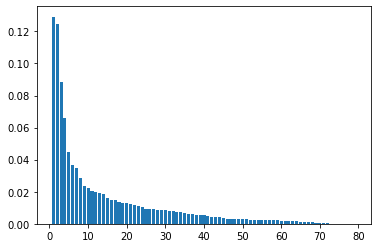

In [102]:
plt.bar(range(1,len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_)

In [103]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

### Making the scree plot

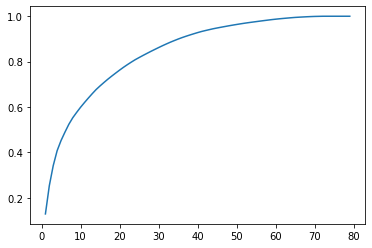

In [104]:
plt.plot(range(1,len(var_cumu)+1), var_cumu)

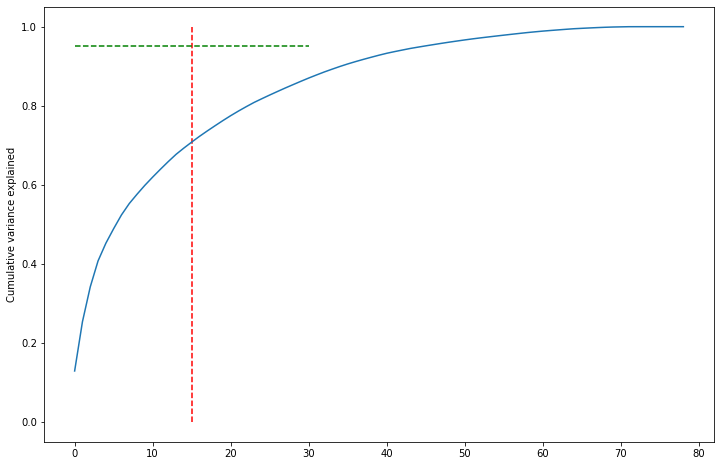

In [105]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

### Performing PCA with 16 components

In [106]:
from sklearn.decomposition import IncrementalPCA

In [107]:
pca_final = IncrementalPCA(n_components=16)

In [108]:
X_train_pca = pca_final.fit_transform(X_train)

In [109]:
X_train_pca.shape

(19355, 16)

In [110]:
corrmat = np.corrcoef(X_train_pca.transpose())

In [111]:
corrmat.shape

(16, 16)

### Plotting the heatmap of the corr matrix

<AxesSubplot:>

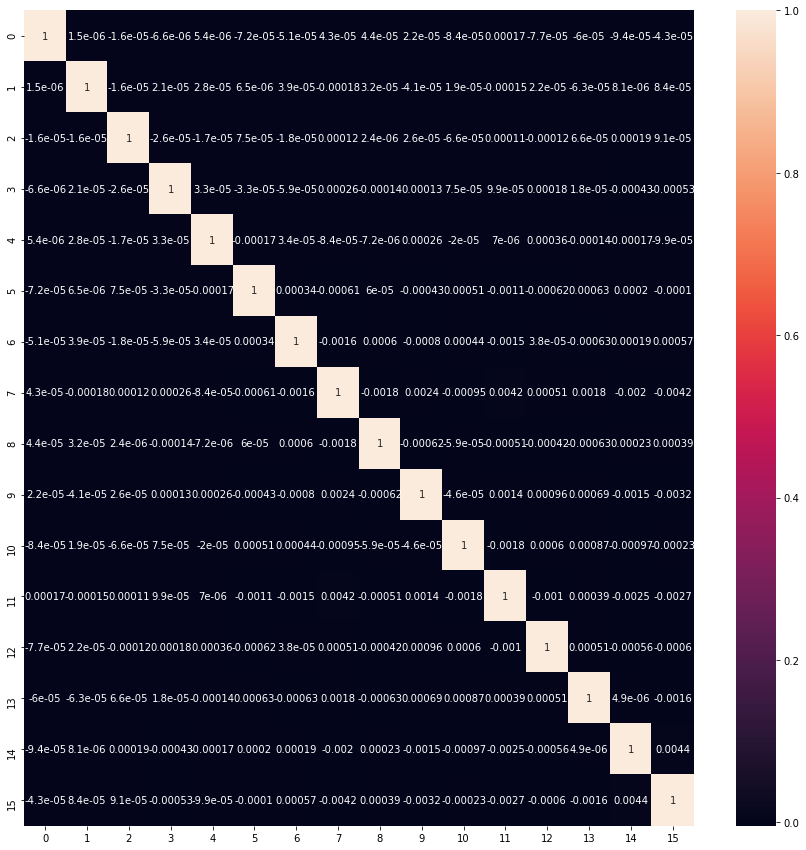

In [112]:
plt.figure(figsize=[15,15])
sns.heatmap(corrmat, annot=True)

### Applying the transformation on the test set

In [113]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(8296, 16)

### Applying logistic regression on the data on our Principal components

In [114]:
from sklearn.linear_model import LogisticRegression

In [115]:
learner_pca = LogisticRegression()

In [116]:
model_pca = learner_pca.fit(X_train_pca, y_train)

### Making predictions on the test set

In [117]:
pred_probs_test = model_pca.predict_proba(X_test_pca)

In [118]:
from sklearn import metrics
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1]))

'0.79'

### Making it a little more unsupervised 

In [119]:
pca_again = PCA(0.9)

In [120]:
X_train_pca2 = pca_again.fit_transform(X_train)

In [121]:
X_train_pca2.shape

(19355, 36)

### Following it up with a logistic regression model

In [122]:
learner_pca2 = LogisticRegression()

In [123]:
model_pca2 = learner_pca2.fit(X_train_pca2, y_train)

In [124]:
X_test_pca2 = pca_again.transform(X_test)

In [125]:
X_test_pca2.shape

(8296, 36)

In [126]:
pred_probs_test2 = model_pca2.predict_proba(X_test_pca2)[:,1]

In [127]:
acc_PCA_lr="{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test2))
acc_PCA_lr

'0.79'

### PCA + Logistic Regression is giving 79% accuracy

### Linear Regression

In [128]:
import statsmodels.api as sm

In [129]:
from sklearn.linear_model import LinearRegression
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)

LinearRegression()

In [130]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

0.11713238560669922
[-3.68973006e-01 -1.63381345e+00 -2.23020470e+00 -2.76531596e-02
  4.64304623e-01  6.66291400e-01  1.07033032e+00  1.18767264e-01
  5.09506866e-02  1.25709110e+00  1.62437518e+00  1.57830576e-02
  6.11271260e-02 -4.20619858e-02 -3.41564735e+08 -2.53604296e-01
 -3.91724531e-01 -1.22307553e-01 -1.85090780e-01 -2.11612726e-01
 -8.94088164e-02 -1.92302278e-01 -1.71855080e-01 -7.79113556e-02
 -4.91900923e-01  2.32033136e-01 -3.54282777e-01 -1.67082425e-01
 -1.87679809e+11 -6.88886646e-02 -1.33487211e-01 -1.36145905e-01
  1.77898078e-03  3.23585877e+10  1.55321221e+11  4.53020228e+10
  6.47171755e+10 -8.27637818e-02 -8.39101939e-02  5.36882067e-01
  4.29178156e-01  7.64603834e-01  1.20415670e+00  6.17199514e-02
 -2.76266468e-02 -3.67101832e-01 -7.84585224e-01 -1.18030159e-01
 -6.84161284e-02 -4.95350733e-01 -8.69921618e-01 -1.59391328e-02
  6.25867275e-02  6.12148450e-02 -4.12821693e-02  1.08920057e-01
  2.39220061e-01  5.66594285e-02  8.34002134e-02  9.89579902e-02
  4.2

In [131]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred_train = lm.predict(X_train)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R Square on train data:', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R Square on test data:',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Residual Sum of Squares on train data:', rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Residual Sum of Squares on test data:', rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Mean Square Error om train data:', mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Mean Square Error om test data:',mse_test_lr)
metric.append(mse_test_lr**0.5)

R Square on train data: 0.18892723540323408
R Square on test data: -2.7156377461844384e+23
Residual Sum of Squares on train data: 1189.085305675523
Residual Sum of Squares on test data: 1.626862106408154e+26
Mean Square Error om train data: 0.06143556216355066
Mean Square Error om test data: 1.9610198968275724e+22


### Ridge Regression

In [132]:
from sklearn.model_selection import train_test_split,GridSearchCV,KFold,cross_val_score
from sklearn.linear_model import Ridge,Lasso
# list of alphas to tune - if value too high it will lead to underfitting, if it is too low, 
# it will not handle the overfitting
params = {'alpha': [0.00001, 0.0001, 0.001, 0.005, 0.0005,0.0015, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 
#https://scikit-learn.org/stable/modules/model_evaluation.html+

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-05, 0.0001, 0.001, 0.005, 0.0005, 0.0015,
                                   0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,
                                   0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0,
                                   7.0, 8.0, 9.0, 10.0, 20, 50, 100, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [133]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.015859,0.000188,0.003217,0.003941,0.00001,{'alpha': 1e-05},-0.152309,-0.149367,-0.150075,-0.153561,...,-0.151390,0.001513,32,-0.149301,-0.151496,-0.151990,-0.150187,-0.150086,-0.150612,0.000985
1,0.016309,0.003042,0.001611,0.003223,0.00010,{'alpha': 0.0001},-0.152307,-0.149363,-0.150075,-0.153560,...,-0.151389,0.001513,31,-0.149301,-0.151494,-0.151989,-0.150186,-0.150086,-0.150611,0.000985
2,0.018221,0.005475,0.005629,0.004658,0.00100,{'alpha': 0.001},-0.152297,-0.149340,-0.150078,-0.153555,...,-0.151381,0.001516,29,-0.149297,-0.151484,-0.151979,-0.150178,-0.150085,-0.150604,0.000982
3,0.018580,0.003267,0.004024,0.004221,0.00500,{'alpha': 0.005},-0.152284,-0.149301,-0.150085,-0.153552,...,-0.151370,0.001523,27,-0.149294,-0.151473,-0.151969,-0.150169,-0.150082,-0.150597,0.000979
4,0.017811,0.001941,0.003202,0.003922,0.00050,{'alpha': 0.0005},-0.152301,-0.149352,-0.150076,-0.153557,...,-0.151385,0.001515,30,-0.149299,-0.151488,-0.151983,-0.150181,-0.150086,-0.150607,0.000983


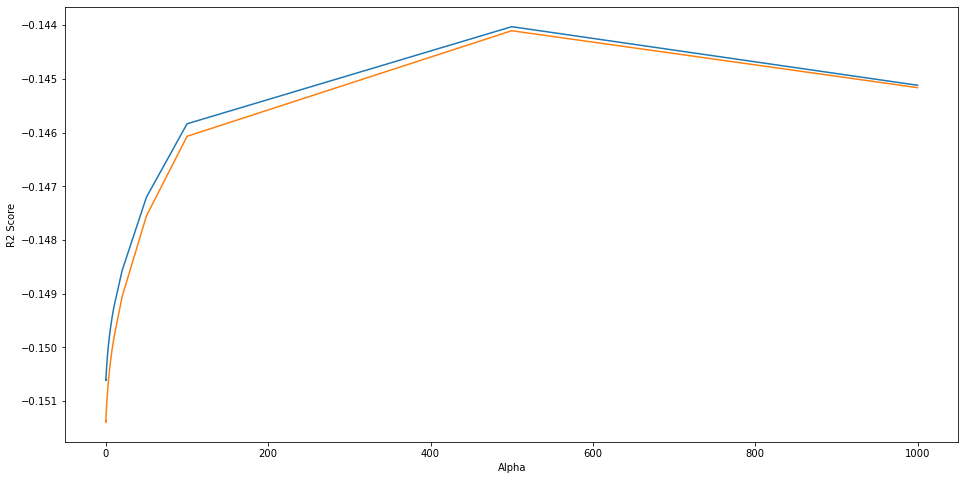

In [134]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

In [135]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 500}


In [136]:
#Fitting Ridge model for alpha = 500 and printing coefficients which have been penalised
alpha = 500
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
print(ridge.coef_)

[-0.0976876  -0.04844085 -0.06130256  0.02760684  0.04117513 -0.03308469
 -0.05802465 -0.01846971 -0.01311689 -0.03654279 -0.03872377 -0.01077281
  0.00166451 -0.03481474  0.         -0.0470569  -0.073032   -0.03250212
 -0.02848715 -0.03763879 -0.02103114 -0.05099029 -0.01099412 -0.01583567
 -0.09825791 -0.10341697 -0.05511551 -0.06454859 -0.05993091 -0.06022657
 -0.04479672 -0.03765505 -0.01863869 -0.03846455 -0.05537396 -0.0104062
 -0.01438551 -0.06832507 -0.02376986 -0.01565794  0.05596687  0.03546453
  0.03258546  0.02526812  0.04033144 -0.0083656  -0.01999311 -0.01109116
 -0.0011888   0.03695939  0.04027037 -0.00134901  0.01574405  0.01306064
  0.00754124 -0.01415611 -0.01718202 -0.0128884   0.0084264   0.00422295
 -0.00184963 -0.00184511  0.0173062   0.00796897  0.02195281  0.06019999
  0.02172818 -0.00193959 -0.01423384 -0.00831988 -0.00953016 -0.00407638
  0.00244293 -0.04238829 -0.01378985  0.00519211  0.00758232 -0.00484025
 -0.00122279]


In [137]:
# Lets calculate some metrics such as R2 score, RSS and RMSE
y_pred_train = ridge.predict(X_train)
y_pred_test = ridge.predict(X_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R square on train data:', r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R square on test data:', r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('Residual Sum of Squares on train data:', rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Residual Sum of Squares on test data:',rss2_lr)
metric2.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('Mean Square Error on train data:',mse_train_lr)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Mean Square Error on test data:',mse_test_lr)
metric2.append(mse_test_lr**0.5)

R square on train data: 0.11765896415060606
R square on test data: -894052.0566599853
Residual Sum of Squares on train data: 1293.5692161290183
Residual Sum of Squares on test data: 535602011.36625636
Mean Square Error on train data: 0.06683385255122802
Mean Square Error on test data: 64561.47677992483


### Checking churn column distribution

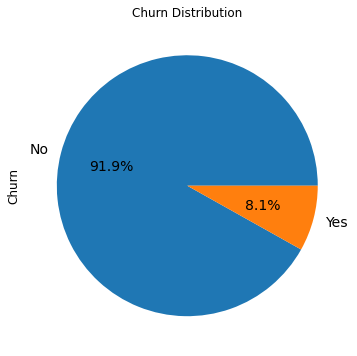

In [138]:
#Churn Distribution
pie_chart = df_final['churn'].value_counts()*100.0 /len(df_final)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

### To improve accuracy and performance of model class imabalance problem should be resolved

### SMOTE

In [139]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X_smote,y_smote = smote.fit_resample(X_train,y_train)

### Checking class imbalance problem after apply smote

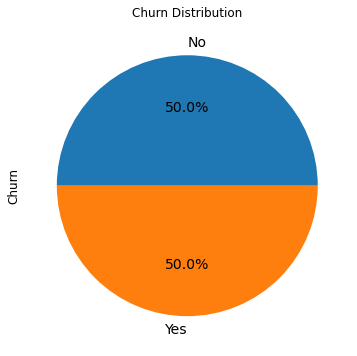

In [140]:
#Churn Distribution
pie_chart = y_smote.value_counts()*100.0 /len(df_final)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

In [141]:
X_smote.shape

(35514, 79)

### Linear Regression after Smote

In [142]:
# Instantiate
lm = LinearRegression()

# Fit a line
lm.fit(X_smote, y_smote)

LinearRegression()

In [143]:
# Print the coefficients and intercept
print(lm.intercept_)
print(lm.coef_)

0.6331050087243161
[-3.09983783e-01 -1.76963915e+00 -4.92989090e+00 -8.73904670e-02
  1.03847384e+00  3.51626023e-01  1.93772989e+00  2.01604287e-01
  1.51243326e-01  1.21701440e+00  3.83944746e+00 -5.62444856e-02
  1.70141161e-01 -7.68592721e-02 -1.04197206e-12 -6.73545975e-01
 -1.12790875e+00 -3.10602623e-01 -5.35285398e-01 -5.56353004e-01
 -3.32455114e-01 -6.96071057e-01 -2.41770572e-01 -1.73726555e-01
 -1.14006189e+00  2.13469398e-01 -3.09991065e-01 -4.79869467e-01
 -9.66782123e-01 -2.21775133e-01 -2.78470473e-01 -5.78879711e-01
 -1.00750824e-01 -6.08939159e-01 -7.20252065e-01 -4.64033155e-01
 -4.45770413e-01 -2.30371397e-01 -3.47248333e-01  1.51763628e+00
  5.49373329e-01 -6.62728880e+00 -5.71470924e+00  3.06406845e-02
  1.41265406e+00  3.63736434e+00  3.06596939e+00 -5.48807411e-03
 -1.75802880e-01  6.78660383e+00  5.86460264e+00  9.29437615e-02
  5.19703242e-02  1.85994665e-01 -1.63006257e-01  1.41573150e-01
  5.22612287e-01 -1.89304063e-02  1.31522714e-01  1.26814789e-01
  9.90

In [144]:
from sklearn.metrics import r2_score, mean_squared_error
y_pred_train = lm.predict(X_smote)
y_pred_test = lm.predict(X_test)

metric = []
r2_train_lr = r2_score(y_smote, y_pred_train)
print('R Square on train data:', r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R Square on test data:',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_smote - y_pred_train))
print('Residual Sum of Squares on train data:', rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('Residual Sum of Squares on test data:', rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_smote, y_pred_train)
print('Mean Square Error om train data:', mse_train_lr)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('Mean Square Error om test data:',mse_test_lr)
metric.append(mse_test_lr**0.5)

R Square on train data: 0.4779581475968623
R Square on test data: -106217146.59227137
Residual Sum of Squares on train data: 4634.948586561258
Residual Sum of Squares on test data: 63631702244.31409
Mean Square Error om train data: 0.13051046310078443
Mean Square Error om test data: 7670166.615756279


In [145]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm

In [146]:
# Logistic regression model
logm1 = sm.GLM(y_smote,(sm.add_constant(X_smote)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                35514
Model:                            GLM   Df Residuals:                    35437
Model Family:                Binomial   Df Model:                           76
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -12688.
Date:                Wed, 28 Jul 2021   Deviance:                       25376.
Time:                        22:31:37   Pearson chi2:                 9.14e+04
No. Iterations:                    26                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            1.0148      0.123      8.270      0.000       0.774       1.255
arpu_8                           3.2739      0.755      4.335      0.000       1.794       4.754
onnet_mou_8                    -50.8666     27.082     -1.878      0.060    -103.946       2.213
offnet_mou_8                   -73.6541     29.353     -2.509      0.012    -131.186     -16.123
roam_ic_mou_8                   -1.1550      0.380     -3.036      0.002      -1.901      -0.409
roam_og_mou_8                   13.0887      5.314      2.463      0.014       2.673      23.504
loc_og_t2t_mou_8                17.7200     12.830      1.381      0.167      -7.427      42.867
loc_og_t2m_mou_8                28.2867     14.994      1.887      0.059      -1.101      57.674
loc_og_t2f_mou_8                 3.5844      1.320      2.716      0.007       0.998       6.171
loc_og_t2c_mou_8                 1.6747      0.388      4.321      0.000       0.915       2.434
std_og_t2t_mou_8                47.2250     26.756      1.765      0.078      -5.215      99.665
std_og_t2m_mou_8                61.5396     26.119      2.356      0.018      10.347     112.732
std_og_t2f_mou_8                 0.5370      0.750      0.716      0.474      -0.933       2.007
isd_og_mou_8                     1.2896      0.646      1.998      0.046       0.024       2.555
spl_og_mou_8                     0.5279      0.806      0.655      0.513      -1.052       2.108
og_others_8                  -6.805e-12   2.63e-12     -2.587      0.010    -1.2e-11   -1.65e-12
loc_ic_t2t_mou_8                -6.1622      0.854     -7.214      0.000      -7.836      -4.488
loc_ic_t2m_mou_8               -20.6994      0.987    -20.968      0.000     -22.634     -18.765
loc_ic_t2f_mou_8                -5.4451      0.843     -6.458      0.000      -7.098      -3.792
std_ic_t2t_mou_8                -7.0912      0.713     -9.946      0.000      -8.489      -5.694
std_ic_t2m_mou_8                -5.7572      0.676     -8.523      0.000      -7.081      -4.433
std_ic_t2f_mou_8                -7.6727      0.881     -8.711      0.000      -9.399      -5.946
spl_ic_mou_8                    -8.4155      0.511    -16.477      0.000      -9.417      -7.414
isd_ic_mou_8                    -1.7993      0.597     -3.012      0.003      -2.970      -0.629
ic_others_8                     -0.6343      0.435     -1.458      0.145      -1.487       0.218
total_rech_num_8                -8.1279      0.498    -16.318      0.000      -9.104      -7.152
total_rech_amt_8                -0.9557      0.777     -1.230      0.219      -2.479       0.567
max_rech_amt_8                   0.4480      0.449      0.998      0.318      -0.431       1.328
last_day_rch_amt_8              -3.4047      0.242    -14.070      0.000    

### Using RFE to reduce the feature

In [147]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_smote, y_smote)

In [148]:
rfe.support_

array([False, False, False, False, False,  True,  True, False, False,
       False, False, False, False, False, False,  True,  True,  True,
        True,  True,  True,  True, False, False,  True, False, False,
        True,  True, False, False,  True, False,  True,  True,  True,
       False, False,  True, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False])

In [149]:
rfe_columns=X_smote.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'std_ic_t2t_mou_8',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'total_rech_data_8',
       'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8',
       'vbc_3g_8', 'avg_arpu_av67', 'avg_loc_ic_t2m_mou_av67',
       'avg_total_rech_num_av67'],
      dtype='object')


In [150]:
# Creating X_train_rfe dataframe with RFE selected variables
X_train_rfe = X_smote[rfe_columns]

In [151]:
X_train_rfe

,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_ic_t2t_mou_8,loc_ic_t2m_mou_8,loc_ic_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,spl_ic_mou_8,total_rech_num_8,last_day_rch_amt_8,total_rech_data_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,vbc_3g_8,avg_arpu_av67,avg_loc_ic_t2m_mou_av67,avg_total_rech_num_av67
0,0.000000,0.000049,0.000000,0.001310,0.000000,0.122715,0.041086,0.000000,0.000000,0.020833,0.091075,0.000000,0.000000,0.0,0.000000,0.0,0.033945,0.221218,0.000303,0.021858
1,0.000000,0.000000,0.000000,0.016445,0.004094,0.000000,0.000000,0.000000,0.087302,0.041667,0.022769,0.068966,0.009718,0.2,0.041667,0.0,0.074335,0.189029,0.008814,0.027322
2,0.000606,0.203375,0.002290,0.058599,0.004094,0.000000,0.000000,0.000000,0.000000,0.083333,0.006375,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.258735,0.070953,0.092896
3,0.011742,0.061746,0.039671,0.114988,0.136738,0.000000,0.002712,0.039204,0.000000,0.229167,0.027322,0.137931,0.088142,0.0,0.166667,0.0,0.000000,0.317378,0.205637,0.267760
4,0.007181,0.013094,0.025821,0.005361,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.027322,0.034483,0.119772,0.2,0.000000,0.0,0.000000,0.191660,0.013988,0.076503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35509,0.000574,0.006800,0.000204,0.005461,0.002290,0.000000,0.000003,0.000000,0.000000,0.071270,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.307090,0.016095,0.262586
35510,0.002546,0.001220,0.010975,0.000781,0.000000,0.031010,0.008556,0.000000,0.000000,0.074102,0.132554,0.000000,0.000000,0.0,0.000000,0.0,0.020881,0.301706,0.000804,0.073473
35511,0.001796,0.005787,0.003069,0.009700,0.000000,0.000000,0.001336,0.000000,0.000000,0.051427,0.000000,0.033397,0.000551,0.0,0.040355,0.0,0.000000,0.312276,0.043880,0.071726
35512,0.001823,0.000994,0.007847,0.006576,0.005378,0.028306,0.001868,0.007033,0.000000,0.036355,0.026357,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.305212,0.008063,0.092118


In [152]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [153]:
lm = sm.OLS(y_smote,X_train_rfe).fit()

In [154]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     1381.
Date:                Wed, 28 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:31:54   Log-Likelihood:                -15555.
No. Observations:               35514   AIC:                         3.115e+04
Df Residuals:                   35493   BIC:                         3.133e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### VIF

In [155]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,total_rech_data_8,14.94
15,sachet_2g_8,14.19
0,const,13.86
4,loc_ic_t2m_mou_8,3.25
19,avg_loc_ic_t2m_mou_av67,2.45
16,monthly_3g_8,2.17
10,total_rech_num_8,2.09
20,avg_total_rech_num_av67,2.00
2,loc_og_t2m_mou_8,1.89
14,monthly_2g_8,1.62


#### Removing "total_rech_data_8", 'const' columns due to high VIF

In [156]:
X_train_new = X_train_rfe.drop(["total_rech_data_8", 'const'], axis = 1)

In [157]:
# checking VIF again
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
18,avg_total_rech_num_av67,5.72
16,avg_arpu_av67,5.35
3,loc_ic_t2m_mou_8,4.21
9,total_rech_num_8,3.96
17,avg_loc_ic_t2m_mou_av67,3.68
1,loc_og_t2m_mou_8,2.33
2,loc_ic_t2t_mou_8,1.75
10,last_day_rch_amt_8,1.67
15,vbc_3g_8,1.63
14,monthly_3g_8,1.57


#### Removing 'avg_total_rech_num_av67' due to VIF greater than 5

In [158]:
X_train_new1 = X_train_new.drop(['avg_total_rech_num_av67'], axis = 1)

In [159]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new1
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,loc_ic_t2m_mou_8,4.17
17,avg_loc_ic_t2m_mou_av67,3.60
16,avg_arpu_av67,3.06
9,total_rech_num_8,2.68
1,loc_og_t2m_mou_8,2.30
2,loc_ic_t2t_mou_8,1.74
15,vbc_3g_8,1.63
10,last_day_rch_amt_8,1.61
0,loc_og_t2t_mou_8,1.57
14,monthly_3g_8,1.55


#### Now VIF of all variables are less than 5

In [160]:
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

In [161]:
lm = sm.OLS(y_smote,X_train_lm).fit()

In [162]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  churn   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     1497.
Date:                Wed, 28 Jul 2021   Prob (F-statistic):               0.00
Time:                        22:31:56   Log-Likelihood:                -15746.
No. Observations:               35514   AIC:                         3.153e+04
Df Residuals:                   35495   BIC:                         3.169e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

### Here after RFE and VIF, R-square value is still 0.43 which can be improved by using classification model

### XGBoost Model

In [163]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, log_loss
from imblearn.over_sampling import SMOTE

import xgboost as xgb  # Load this xgboost

from sklearn.model_selection import train_test_split


# Import and suppress warnings
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, learning_curve, train_test_split


In [164]:
xgb_cfl = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgb_cfl.get_params()

{'objective': 'binary:logistic',
 'use_label_encoder': True,
 'base_score': None,
 'booster': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'gamma': None,
 'gpu_id': None,
 'importance_type': 'gain',
 'interaction_constraints': None,
 'learning_rate': None,
 'max_delta_step': None,
 'max_depth': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [165]:
# Fit the model to our train and target
xgb_cfl.fit(X_smote, y_smote)  # default 
# Get our predictions
xgb_predictions = xgb_cfl.predict(X_test)

[22:31:56] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [166]:
xgb_predictions_prob = xgb_cfl.predict_proba(X_test)
xgb_predictions_prob

array([[9.9345744e-01, 6.5425397e-03],
       [1.4445871e-01, 8.5554129e-01],
       [9.4657350e-01, 5.3426523e-02],
       ...,
       [9.9714547e-01, 2.8545232e-03],
       [9.1714323e-01, 8.2856767e-02],
       [9.9974293e-01, 2.5709587e-04]], dtype=float32)

In [167]:
accuracy_score(y_test, xgb_predictions)

0.9373191899710704

### XGBoost model has given good improvement in the accuracy which is 93%

### Strategies to manage customer churn

1. Less number of **high value customer** are churing but for last **6 month** no new high valued cusotmer is onboarded which is concerning and company should concentrate on that aspect.
2. Customers with less than 4 years of tenure are more likely to churn and company should concentrate more on that segment by rolling out new schems to that group.
3. Average revenue per user seems to be most important feature in determining churn prediction.
4. Incoming and Outgoing Calls on romaing for 8th month are strong indicators of churn behaviour.
5. Local Outgoing calls made to landline , fixedline , mobile and call center provides a strong indicator of churn behaviour.
6. Better 2G/3G area coverage where 2G/3G services are not good, it's strong indicator of churn behaviour.

### Results and Analysis

- I have chosen accuracy as metric evaluation technique to compare results of different models. 
- PCA dimentionality technique has been used to reduce the features.
- SMOTE has been used to handle class imbalance problem. The same has been presented using pie chart.
- Logistic Rgression with PCA has given 79% accuracy.
- Linear Regression after handling class imbalance problem and RFE is used to reduce the features has given 43% accuracy.
- XGBoost has given approx 94% accuracy and outperformed the other models.